## Importações e dependências

In [1]:
import os
import glob
import cv2
import numpy as np
import hashlib
import matplotlib.pyplot as plt
import shutil

from keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing.image import ImageDataGenerator
from collections import Counter

print("Importações e dependencias feitas com sucesso")

Importações e dependencias feitas com sucesso


## Caminhos

In [2]:
# Diretório onde as imagens do dataset se encontram armazenadas

#data_train = '/Users/hugopereira/DatasetMEIA/train'
#data_test = '/Users/hugopereira/DatasetMEIA/test'
data_train = 'C:/Dev/DatasetMEIA/train'
data_test = 'C:/Dev/DatasetMEIA/test'

if os.path.exists(data_train) and os.path.exists(data_test):
    print("As pastas de dados para a importação do treino e teste existem e estão acessíveis.")
else:
    if not os.path.exists(data_train):
        print(f"A pasta de treino para a importação'{data_train}' não existe ou não está acessível.")
    if not os.path.exists(data_test):
        print(f"A pasta de teste para a importação '{data_test}' não existe ou não está acessível.")

#Diretório onde as imagens pre processadas serão ser exportadas
export_train = 'C:/Dev/DataProcessed/train'
export_test = 'C:/Dev/DataProcessed/test'

def delete_folder_if_exists(main_folder):
    # Verifique se o diretório principal existe
    if os.path.exists(main_folder):
        # Se existir, apague-o
        shutil.rmtree(main_folder)
        print(f"Pasta para a exportação ja existe em: {main_folder}, esta foi apagada.")

    # Agora crie o diretório
    os.makedirs(main_folder)
    print(f"Pasta para a exportação criada em: {main_folder}")
    

delete_folder_if_exists(export_train)
delete_folder_if_exists(export_test)

As pastas de dados para a importação do treino e teste existem e estão acessíveis.
Pasta para a exportação ja existe em: C:/Dev/DataProcessed/train, esta foi apagada.
Pasta para a exportação criada em: C:/Dev/DataProcessed/train
Pasta para a exportação ja existe em: C:/Dev/DataProcessed/test, esta foi apagada.
Pasta para a exportação criada em: C:/Dev/DataProcessed/test


## Importar Imagens 
Importação de imagens do conjunto teste e treino para efetuar o seu processamento. Ao importar a imagem é tambem guardado o nome a ela associado e é criada uma hash para posteriormente verificar se existem imagens duplicadas.



In [3]:
#Função para calcular uma hash para cada imagem
def calculate_hash(img):
    return hashlib.sha256(img).hexdigest()

# Função para carregar imagens de uma dada pasta
def load_images_from_folder(folder):
    images_info={}
    images_by_class = {} 
    #Considera todas as pastas dentro do diretorio em que se encontra
    class_folders=glob.glob(os.path.join(folder, "*"))
    
    for class_folder in class_folders:
        class_label = os.path.basename(class_folder)
        print(f"A carregar imagens de {class_label}...")
        images = [] #Imagens de uma dada classe
        hashes = [] #Hashes de uma dada classe
        filenames=[]
        
        images_info[class_label]=[]
        for filename in os.listdir(class_folder):
            try:
                img = cv2.imread(os.path.join(class_folder, filename),cv2.IMREAD_UNCHANGED)
                if img is not None:
                    images.append(img)     
                    hash_imagem=calculate_hash(img)
                    images_info[class_label].append({'hash': hash_imagem, 'name': filename})
                else:
                    print(f"Não foi possível carregar a imagem: {filename}")
            except Exception as e:
                    print(f"Erro ao carregar a imagem {filename}: {str(e)}")   
        # Armazenar imagens no dicionário por classe
        images_by_class[class_label] = images
    return images_by_class, images_info
    #return images, hashes, path, labels, filenames, images_by_class, images_info

# Carregar imagens de treino e teste
train_images_by_class, train_info = load_images_from_folder(data_train)
test_images_by_class, test_info  = load_images_from_folder(data_test)

def print_count_by_class(dictionary):
    total=0
    for key, value in dictionary.items():
        elements=len(value)
        total=total+elements
        print(f"Classe: {key}, Número de imagens: {len(value)}")
    print("Total Importado: ",total)

# Imprimir o número e nomes dos arquivos por classe nos dados de treino
print("Imagens de treino por classe:")
print_count_by_class(train_images_by_class)

# Imprimir o número e nomes dos arquivos por classe nos dados de teste
print("Imagens de teste por classe:")
print_count_by_class(test_images_by_class)


A carregar imagens de Atopic Dermatitis Photos...
A carregar imagens de Lupus and other Connective Tissue diseases...
A carregar imagens de Melanoma Skin Cancer Nevi and Moles...
A carregar imagens de Psoriasis pictures Lichen Planus and related diseases...
A carregar imagens de Urticaria Hives...
A carregar imagens de Atopic Dermatitis Photos...
A carregar imagens de Lupus and other Connective Tissue diseases...
A carregar imagens de Melanoma Skin Cancer Nevi and Moles...
A carregar imagens de Psoriasis pictures Lichen Planus and related diseases...
A carregar imagens de Urticaria Hives...
Imagens de treino por classe:
Classe: Atopic Dermatitis Photos, Número de imagens: 489
Classe: Lupus and other Connective Tissue diseases, Número de imagens: 420
Classe: Melanoma Skin Cancer Nevi and Moles, Número de imagens: 463
Classe: Psoriasis pictures Lichen Planus and related diseases, Número de imagens: 1405
Classe: Urticaria Hives, Número de imagens: 212
Total Importado:  2989
Imagens de tes

In [ ]:
#Função para ver as imagens lado a lado
def see_array_plt(images, images_title=None):
    num_images = len(images)
    if images_title is None:
        images_title = [f"Image {i+1}" for i in range(num_images)]
        
    num_rows = (num_images - 1) // 3 + 1
    plt.figure(figsize=(20, 6 * num_rows))
    for num in range(num_images):
        plt.subplot(num_rows, 3, num + 1)
        plt.axis(False)
        plt.title(f"{images_title[num]}.")
        plt.imshow(images[num]);

In [ ]:
max_images = 6  # Define o número máximo de imagens a serem mostradas
print("Visualização de algumas imagens de treino")
see_array_plt(train_images[:max_images])
plt.show()  # Garante que as imagens de treino sejam exibidas antes do próximo print
print("-------------------------------------------------")
print("Visualização de algumas imagens de teste")
see_array_plt(test_images[:max_images])
plt.show()  # Garante que as imagens de treino sejam exibidas antes do próximo print

# Pré-processamento

## 1.1 Verificação/Eliminação de Imagens Duplicadas

Para ambos os conjuntos(treino e teste) é verificado atravês das hashes previamente criadas se existem hashes duplicadas e consequentemente imagens duplicadas. 
Caso existam, a posição de um elemento do conjunto de duplicação é guardada num array separado para ser posteriormente essa posição ser elimininada do array das imagens, do nome das imagens, e das hashes das imagens. Este processo é efetuado ate o array que guarda os conjuntos de duplicados tenha tamanho 0, para prevenir que elimina imagens que possuam aparecer triplicadas, quadriplicadas, etc.

In [4]:
def find_duplicate_images(images_info):
    hash_to_names = {}
    
    for images_list in images_info.values():
        for image_info in images_list:
            hash_val = image_info['hash']
            image_name = image_info['name']
            if hash_val not in hash_to_names:
                hash_to_names[hash_val] = [image_name]
            else:
                hash_to_names[hash_val].append(image_name)
    
    to_del= []
    for key, value in hash_to_names.items():
        if len(value) <= 1:
            to_del.append(key)
    
    # Remover as chaves que têm apenas um valor associado
    for i in to_del:
        del hash_to_names[i]
        
    return hash_to_names

def see_duplicate(duplicate, folder):
    print(f"Nomes de imagens duplicadas no conjunto {folder} agrupados por hash:")
    for hash_val, names in train_duplicate.items():
        print(hash_val)
        for name in names:
            print("-", name)


train_duplicate = find_duplicate_images(train_info)
see_duplicate(train_duplicate, "treino")

print("---------------------------------------------")

test_duplicate = find_duplicate_images(test_info)
see_duplicate(test_info, "teste")

Nomes de imagens duplicadas no conjunto treino agrupados por hash:
faa52db08190771cf87f819b6f7c0fafa929a57d7bbf3c9d6ac0946f595ac849
- 05atopicChild0828062.jpg
- 05atopicWrist0828064.jpg
6ad5b27897757d689d043851c0359b0c4608c3d5d568a15946b05315dcb1ba38
- 05AtopicDermHand.jpg
- 05AtopicHand.jpg
- 05AtopicHandq.jpg
1a2c30db137e5f6c87b6dcf6b4e0c37b1112236483526eb249423e13b135689e
- 05AtopicDermHand1.jpg
- 05AtopicHand1q.jpg
59d82d9ecbadbe11e6e78cb21f0b052245cc65f1c849880b67c78721f846ab7e
- 05AtopicWrist.jpg
- 05AtopicWristq.jpg
5e83cac71581c34450fd97f19c2973422b46649fa47bfd080ff77472cde6ad23
- 05pityriasisAlba94-GP3.jpg
- 05pityriasisAlba94.jpg
5eeffc04edb2b1b5ccabfd43d4c59ecbec69f3419b6eb4a46e4f07c2c0f59348
- chilblains-perniosis-32.jpg
- chilblains-perniosis-38.jpg
5ae5aa7e39a9f59d529980566bc410b10fcfefc54e9c1b09fd06e512b3731dba
- lupus-chronic-cutaneous-10.jpg
- lupus-chronic-cutaneous-11.jpg
4af21e01442b95aecf598aef878c170aebd32f7812ba5b0a55c442b223722a5a
- lupus-chronic-cutaneous-12.jp

In [5]:
def remove_duplicates_from_dicts(duplicate, images_info, images):
    # Lista para armazenar as chaves a serem removidas dos dicionários
    to_del = {}
    
    # Iterar sobre as duplicatas encontradas
    for hash_val, names in duplicate.items():
        # Manter apenas a primeira ocorrência e remover as outras do dicionário images_info
        for name in names[1:]:
            for classe, values  in images_info.items():
               for pos, value in enumerate(values): 
                    if value['name'] == name and value['hash'] == hash_val:
                        if classe not in to_del:
                            to_del[classe] = []
                        to_del[classe].append(pos)
                        #print(value['name'])
    #print(to_del)
    
     # Remover os itens dos dicionários images_info e images
    for classe, positions in to_del.items():
        for pos in sorted(positions, reverse=True):
            del images_info[classe][pos]
            del images[classe][pos]
    
    return images_info, images
    
print("Tamanho antes da remoção do dicionario imagens: ")
print_count_by_class(train_images_by_class)
print("Tamanho antes da remoção do dicionario info: ")
print_count_by_class(train_info)

train_info2, train_images_by_class2 = remove_duplicates_from_dicts(train_duplicate, train_info, train_images_by_class)

print("Tamanho depois da remoção do dicionario imagens: ")
print_count_by_class(train_images_by_class2)
print("Tamanho depois da remoção do dicionario info: ")
print_count_by_class(train_info2)

print("------------------------------------")

print("Tamanho antes da remoção do dicionario imagens: ")
print_count_by_class(test_images_by_class)
print("Tamanho antes da remoção do dicionario info: ")
print_count_by_class(test_info)

test_info2, test_images_by_class2 = remove_duplicates_from_dicts(test_duplicate, test_info, test_images_by_class)

print("Tamanho depois da remoção do dicionario imagens: ")
print_count_by_class(test_images_by_class2)
print("Tamanho depois da remoção do dicionario info: ")
print_count_by_class(test_info2)

Tamanho antes da remoção do dicionario imagens: 
Classe: Atopic Dermatitis Photos, Número de imagens: 489
Classe: Lupus and other Connective Tissue diseases, Número de imagens: 420
Classe: Melanoma Skin Cancer Nevi and Moles, Número de imagens: 463
Classe: Psoriasis pictures Lichen Planus and related diseases, Número de imagens: 1405
Classe: Urticaria Hives, Número de imagens: 212
Total Importado:  2989
Tamanho antes da remoção do dicionario info: 
Classe: Atopic Dermatitis Photos, Número de imagens: 489
Classe: Lupus and other Connective Tissue diseases, Número de imagens: 420
Classe: Melanoma Skin Cancer Nevi and Moles, Número de imagens: 463
Classe: Psoriasis pictures Lichen Planus and related diseases, Número de imagens: 1405
Classe: Urticaria Hives, Número de imagens: 212
Total Importado:  2989
Tamanho depois da remoção do dicionario imagens: 
Classe: Atopic Dermatitis Photos, Número de imagens: 483
Classe: Lupus and other Connective Tissue diseases, Número de imagens: 416
Classe:

In [6]:
del find_duplicate_images, see_duplicate, remove_duplicates_from_dicts

train_info=train_info2
train_images_by_class=train_images_by_class2
del train_duplicate, train_info2, train_images_by_class2

test_info=test_info2
test_images_by_class=test_images_by_class2
del test_duplicate, test_info2,test_images_by_class2


print("Otimização de memoria concluida")

Otimização de memoria concluida


## 1.2 Redimensionar Imagens
Para ambos os conjuntos(treino e teste) o tamanho das imagens é ajustado, cortando a imagem caso esta seja maior que o tamanho pretendido(224x224) ou então aumentada atraves de uma borda.

In [7]:
# Redimensionar imagens
def resize_images(images, new_size):
    resized_images = {}
    for class_label, class_images in images.items():
        resized_images[class_label] = []
        for img in class_images:
            resized_img = cv2.resize(img, new_size)
            resized_images[class_label].append(resized_img)
    return resized_images

# Tamanho desejado para as imagens (250x250)
new_size = (250, 250)

# Redimensionar imagens de treino e teste
train_images_resized = resize_images(train_images_by_class, new_size)
test_images_resized = resize_images(test_images_by_class, new_size)

# Verificar se as imagens foram redimensionadas corretamente
print("Treino")
for class_label, resized_images in train_images_resized.items():
    print(f"Número de imagens de treino redimensionadas para a classe {class_label}: {len(resized_images)}")

print("Teste")
for class_label, resized_images in test_images_resized.items():
    print(f"Número de imagens de teste redimensionadas para a classe {class_label}: {len(resized_images)}")

Treino
Número de imagens de treino redimensionadas para a classe Atopic Dermatitis Photos: 483
Número de imagens de treino redimensionadas para a classe Lupus and other Connective Tissue diseases: 416
Número de imagens de treino redimensionadas para a classe Melanoma Skin Cancer Nevi and Moles: 453
Número de imagens de treino redimensionadas para a classe Psoriasis pictures Lichen Planus and related diseases: 1378
Número de imagens de treino redimensionadas para a classe Urticaria Hives: 208
Teste
Número de imagens de teste redimensionadas para a classe Atopic Dermatitis Photos: 123
Número de imagens de teste redimensionadas para a classe Lupus and other Connective Tissue diseases: 105
Número de imagens de teste redimensionadas para a classe Melanoma Skin Cancer Nevi and Moles: 115
Número de imagens de teste redimensionadas para a classe Psoriasis pictures Lichen Planus and related diseases: 350
Número de imagens de teste redimensionadas para a classe Urticaria Hives: 53


In [ ]:
#Função para visualizar uma imagem a partir do cv2
def see_cv2(title, img, stop=False):
    if not title: cv2.imshow(img) 
    else: cv2.imshow(title,img)
    if stop: 
        cv2.waitKey(0) 
        cv2.destroyAllWindows()
        
#Função para visualizar uma imagem a partir do plot
def see_plt(title, img):
    if title: plt.title(title)
    plt.imshow(img)  
    plt.show()

#Cria a variavel original para testar e analisar diferentes tipos de manipulações a mesma imagem
#original=train_images_resized[0]
original=train_images_resized[0]

print("Funções e imagem original criadas com sucesso.")

In [ ]:
# Filtros de cor
def see_filters(img):
    filter_array=[]
    filter_legend=[]

    
    title="Original"
    filter_array.append(img)
    filter_legend.append(title)
    #see_cv2(title,img)
    #see_plt(title,img)
    
    # Filtro de Média 5*5
    media5 = cv2.blur(img, (5, 5))  # Aplica um filtro de média 5x5
    title="Filtro de Media 5*x5"
    filter_array.append(media5)
    filter_legend.append(title)
    #see_cv2(title,media)
    #see_plt(title,media)

    # Filtro de Média 8*8
    media8 = cv2.blur(img, (8, 8))  # Aplica um filtro de média 8x8
    title="Filtro de Media 8*x8"
    filter_array.append(media8)
    filter_legend.append(title)
    #see_cv2(title,media)
    #see_plt(title,media)
    
    
    #Filtro de Mediana
    mediana = cv2.medianBlur(img, 5)  # Aplica um filtro de mediana 5x5
    title="Filtro de Mediana"
    filter_array.append(mediana)
    filter_legend.append(title)
    #see_cv2(title,mediana)
    #see_plt(title,mediana)
    
    # Filtro Gaussiano
    gaussiano = cv2.GaussianBlur(img, (5, 5), 0)  # Aplica um filtro Gaussiano 5x5
    title="Filtro Gaussiano"
    filter_array.append(gaussiano)
    filter_legend.append(title)
    #see_cv2(title,gaussiano,True)
    #see_plt(title,gaussiano)

    return filter_array,filter_legend, media8


filter_array,filter_legend, media8=see_filters(original)

see_array_plt(filter_array,filter_legend)

In [ ]:
#Segmentation Limiar

segmentation_array=[]
segmentation_array_legend=[]

segmentation_array.append(original)
segmentation_array_legend.append("Original")

segmentation_array.append(media8)
segmentation_array_legend.append("Media8")

# Aplicar o método de limiarização
_, thresholded_image_original = cv2.threshold(original, 120, 255, cv2.THRESH_BINARY)
_, thresholded_image_media8 = cv2.threshold(media8, 120, 255, cv2.THRESH_BINARY)

segmentation_array.append(thresholded_image_original)
segmentation_array_legend.append("Segmentação a partir da original")

segmentation_array.append(thresholded_image_media8)
segmentation_array_legend.append("Segmentação a partir da media8")

edge_original = cv2.Canny(original, 100, 200)
segmentation_array.append(edge_original)
segmentation_array_legend.append("Segmentação de borda a partir da original")

edge_media8 = cv2.Canny(media8, 100, 200)
segmentation_array.append(edge_media8)
segmentation_array_legend.append("Segmentação de borda a partir da media8")

see_array_plt(segmentation_array, segmentation_array_legend)


In [ ]:
def foreground_detection(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Set a threshold to create a binary mask
    _, mask = cv2.threshold(blurred, 165, 255, cv2.THRESH_BINARY)
    
    # Invert the mask
    mask = cv2.bitwise_not(mask)
    
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw the contours on the original image
    result = image.copy()
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    
    return result

def teste(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for skin color in HSV
    lower_skin = np.array([0, 20, 30], dtype=np.uint8)
    upper_skin = np.array([50, 100, 255], dtype=np.uint8)

    # Create a binary mask for skin color
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    return skin_mask

# Perform foreground/background detection
output_image = teste(train_images[0])
output_image2=foreground_detection(train_images[0])

# Display the result
cv2.imshow('Result', output_image)
cv2.destroyAllWindows()
cv2.imshow('Result 2', output_image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
def pre_processamento(image):
    image_steps=[]
    images_steps_category=[]
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image_steps.append(gray_image)
    images_steps_category.append("Cinzenta")
    
    # Normalizar iluminação
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    normalized = clahe.apply(gray_image)
    
    image_steps.append(normalized)
    images_steps_category.append("Normalizar Iluminiação")
    
    # Suavização da imagem
    blurred = cv2.GaussianBlur(normalized, (5, 5), 0)

    image_steps.append(blurred)
    images_steps_category.append("Gaussian")

    #Filtro da Media
    media = cv2.blur(blurred, (5, 5))  # Aplica um filtro de média 5x5
    media2 = cv2.blur(blurred, (8, 8))  # Aplica um filtro de média 5x5

    image_steps.append(media)
    images_steps_category.append("Media 5x5")

    image_steps.append(media2)
    images_steps_category.append("Media 8x8")
    
    # Detecção de bordas
    edges = cv2.Canny(blurred, 50, 150)

    # Definir faixa para cor da pele em HSV
    lower_skin = np.array([0, 30, 60], dtype=np.uint8)
    upper_skin = np.array([20, 150, 255], dtype=np.uint8)

    # Criar máscara binária para a cor da pele
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

    # Aplicar a máscara da pele à detecção de bordas
    skin_edges = cv2.bitwise_and(edges, edges, mask=skin_mask)

    return skin_edges, image_steps, images_steps_category

_,image_steps,image_steps_category=pre_processamento(train_images[0])
see_array_plt(image_steps,image_steps_category)

In [ ]:
# Converter listas de imagens para arrays numpy
#train_images_array = np.array(train_images_resized)
#test_images_array = np.array(test_images_resized)

# Verificar se as imagens foram convertidas corretamente para arrays numpy
#print(f"Número de imagens de treino arrays numpy: {len(train_images_array)}")
#print(f"Número de imagens de teste arrays numpy: {len(test_images_array)}")

In [ ]:
#from keras.utils import to_categorical

# One-hot
#class_to_int = {
    #'Atopic Dermatitis Photos': 1,
    #'Melanoma Skin Cancer Nevi and Moles': 2,
    #'Psoriasis pictures Lichen Planus and related diseases': 3,
    #'Urticaria Hives': 4
#}

# Converta suas labels para números inteiros usando o mapeamento
#train_labels_int = [class_to_int[label] for label in train_labels]
#test_labels_int = [class_to_int[label] for label in test_labels]

# Transforme os números inteiros em vetores one-hot
#train_labels_one_hot = to_categorical(train_labels_int, num_classes=5)
#test_labels_one_hot = to_categorical(test_labels_int, num_classes=5)

In [ ]:
#print("Formato das labels de treinamento após one-hot encoding:", train_labels_one_hot.shape)

In [ ]:
#print("Labels de treinamento após one-hot encoding:", train_labels_one_hot)

## 1.3 Normalização

Transformação de cada instancia para um intervalo especifico: [0,1]. 

In [8]:
def normalize_images(images):
    normalized_images_dict = {}
    for class_label, class_images in images.items():
        normalized_images = []
        for img in class_images:
            normalized_img = img / 255.0  # Normalizar os valores dos pixels para o intervalo [0, 1]
            normalized_images.append(normalized_img)
        normalized_images_dict[class_label] = np.array(normalized_images)
    return normalized_images_dict

# Normalizar imagens de treinamento e teste
print("Imagens do treino normalizadas concluídas...")
train_images_normalized = normalize_images(train_images_resized)
for class_label, normalized_images in train_images_normalized.items():
    print(f"Número de imagens de treino normalizadas para a classe {class_label}: {normalized_images.shape}")


print("Imagens do teste normalizadas concluídas...")
test_images_normalized = normalize_images(test_images_resized)
for class_label, normalized_images in test_images_normalized.items():
    print(f"Número de imagens de teste normalizadas para a classe {class_label}: {normalized_images.shape}")

Imagens do treino normalizadas concluídas...
Número de imagens de treino normalizadas para a classe Atopic Dermatitis Photos: (483, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Lupus and other Connective Tissue diseases: (416, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Melanoma Skin Cancer Nevi and Moles: (453, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Psoriasis pictures Lichen Planus and related diseases: (1378, 250, 250, 3)
Número de imagens de treino normalizadas para a classe Urticaria Hives: (208, 250, 250, 3)
Imagens do teste normalizadas concluídas...
Número de imagens de teste normalizadas para a classe Atopic Dermatitis Photos: (123, 250, 250, 3)
Número de imagens de teste normalizadas para a classe Lupus and other Connective Tissue diseases: (105, 250, 250, 3)
Número de imagens de teste normalizadas para a classe Melanoma Skin Cancer Nevi and Moles: (115, 250, 250, 3)
Número de imagens de teste normaliz

In [ ]:
#Augmentation
# Criar um gerador de imagens com técnicas de aumento de dados
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Redimensionar imagens para o formato esperado pelo ImageDataGenerator
#train_images_augmented = train_images_normalized.reshape(-1, new_size[0], new_size[1], 3)

# Ajustar o gerador às imagens de treinamento
#datagen.fit(train_images_augmented)

## 1.4 Balanceamento dos dados

Para balancear as classes existentes implementamos o Random Over Sampler, este aumenta artificialmente o número de exemplos nas classes minoritárias.


Contagem de amostras antes do balanceamento: {'Atopic Dermatitis Photos': 483, 'Lupus and other Connective Tissue diseases': 416, 'Melanoma Skin Cancer Nevi and Moles': 453, 'Psoriasis pictures Lichen Planus and related diseases': 1378, 'Urticaria Hives': 208}


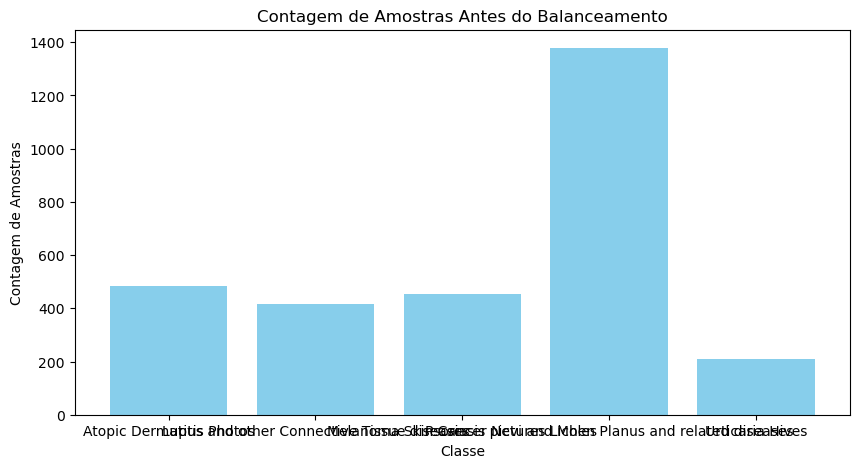

Shape original de X: (2938, 250, 250, 3)
Shape original de Y: (2938,)
Shape dos dados balanceados de X: (6890, 187500)
Shape dos dados balanceados de Y: (6890,)


In [11]:

def plot_sample_counts(data_dict, title):
    labels = list(data_dict.keys())
    counts = list(data_dict.values())
    
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color='skyblue')
    plt.xlabel('Classe')
    plt.ylabel('Contagem de Amostras')
    plt.title(title)
    plt.show()

# Função para calcular a contagem de amostras por classe
def count_samples_by_class(data_dict):
    counts = {label: len(samples) for label, samples in data_dict.items()}
    return counts

# Contagem de amostras antes do balanceamento
before_balancing = count_samples_by_class(train_images_normalized)
print("Contagem de amostras antes do balanceamento:", before_balancing)
plot_sample_counts(before_balancing, 'Contagem de Amostras Antes do Balanceamento')

# Separar as chaves (y) e os valores correspondentes (X)
X = []
Y = []

for y, x in train_images_normalized.items():
    X.extend(x)
    Y.extend([y] * len(x))  # Replicando o rótulo 'y' para cada imagem 'x'

# Converter para numpy arrays
X = np.array(X)
Y = np.array(Y)

# Shape original dos dados
print("Shape original de X:", X.shape)
print("Shape original de Y:", Y.shape)

#Realizar oversampling apenas nas classes minoritárias após a normalização
oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X.reshape(-1, np.prod(X.shape[1:])), Y)

# Shape dos dados balanceados
print("Shape dos dados balanceados de X:", X_resampled.shape)
print("Shape dos dados balanceados de Y:", Y_resampled.shape)

# Contagem de amostras após o balanceamento

#after_balancing = count_samples_by_class(X_resampled)
#print("\nContagem de amostras após o balanceamento:", after_balancing)
#plot_sample_counts(after_balancing, 'Contagem de Amostras Após o Balanceamento')

Label: Atopic Dermatitis Photos, Número de imagens: 1378
Label: Lupus and other Connective Tissue diseases, Número de imagens: 1378
Label: Melanoma Skin Cancer Nevi and Moles, Número de imagens: 1378
Label: Psoriasis pictures Lichen Planus and related diseases, Número de imagens: 1378
Label: Urticaria Hives, Número de imagens: 1378


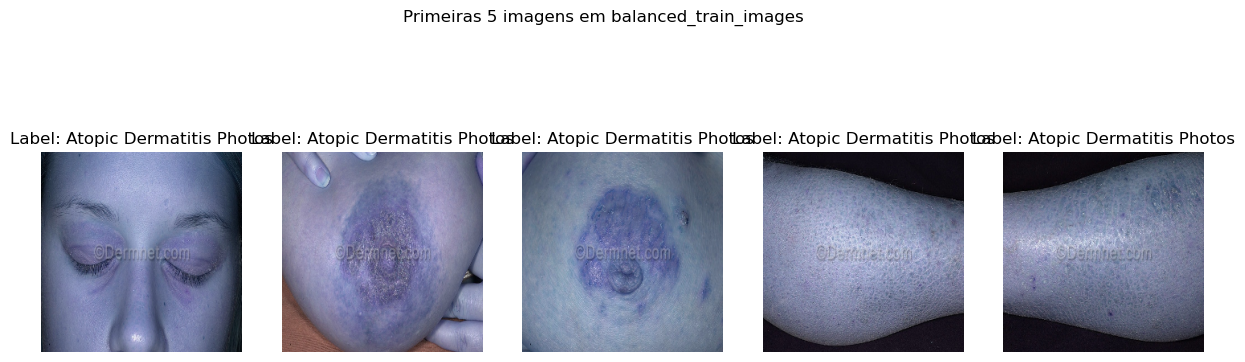

In [12]:
balanced_train_images={}
for i, y in enumerate(Y_resampled):
    x = X_resampled[i].reshape((250, 250, 3))
    if y not in balanced_train_images:
        balanced_train_images[y] = []
    balanced_train_images[y].append(x)

for label, images in balanced_train_images.items():
    print(f"Label: {label}, Número de imagens: {(len(images))}")

# Visualizar as primeiras 5 imagens em balanced_train_images
plt.figure(figsize=(15, 5))
for label, images in balanced_train_images.items():
    for i in range(min(5, len(images))):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title(f'Label: {label}')
        plt.axis('off')
    break  # Mostrar apenas as imagens da primeira classe
plt.suptitle('Primeiras 5 imagens em balanced_train_images')
plt.show()

# Guardar os novos dados
Após o pre-processamento estar concluido guardar a nova instancia dos dados para posteriormente utiliza-los para treinar diferentes modelos 

In [13]:
# Função para salvar as imagens em pastas
def save_images_to_folders(data, output_dir):
    # Iterar sobre as chaves e valores do dicionário
    for label, images in data.items():
        # Criar o diretório se não existir
        label_dir = os.path.join(output_dir, str(label))
        os.makedirs(label_dir, exist_ok=True)
        
        # Salvar cada imagem no diretório correspondente
        for i, img in enumerate(images):
            img_path = os.path.join(label_dir, f"image_{i}.jpg")
            #cv2.imwrite(img_path, img) #work for treino 
            min_val,max_val=img.min(),img.max()
            img = 255.0*(img - min_val)/(max_val - min_val)
            img = img.astype(np.uint8)
            cv2.imwrite(img_path, img)


save_images_to_folders(balanced_train_images, export_train)
print("Images de treino guardadas com sucesso")
save_images_to_folders(test_images_resized, export_test)
print("Images de teste guardadas com sucesso")

Images de treino guardadas com sucesso
Images de teste guardadas com sucesso
